# Practical Session 1 Unsupervised learning

In [1]:
#necessary imports
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

### 1 Loading Data

In [52]:
temp_dataset=np.load('temper.npz')
digits_dataset=np.load('digits.npz')
print(type(temp_dataset))
print(type(digits_dataset))


<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.lib.npyio.NpzFile'>


#### Temperature dataset


In [3]:
#store values
data=temp_dataset.get('data')
cities=temp_dataset.get('villes')
varname=temp_dataset.get('varname')
print('data shape: ',data.shape)
print('cities shape: ',cities.shape)
print('varname shape: ',varname.shape)

x1=[]
for i in range(0,len(data)):
    inter=[]
    inter.append(cities[i])
    for j in range(0,len(data[i])-2):
        inter.append(data[i][j])
        
    x1.append(inter)

data shape:  (15, 14)
cities shape:  (15,)
varname shape:  (14,)


##### plot avg. temperature for each month 

In [7]:
#check mean of the data per month
#disregard the Latitude and Longitude
mean=np.mean(data,axis=0)
#list_print=[]
# for i in range(0,len(varname)):
#     print(varname[i],':',mean[i])

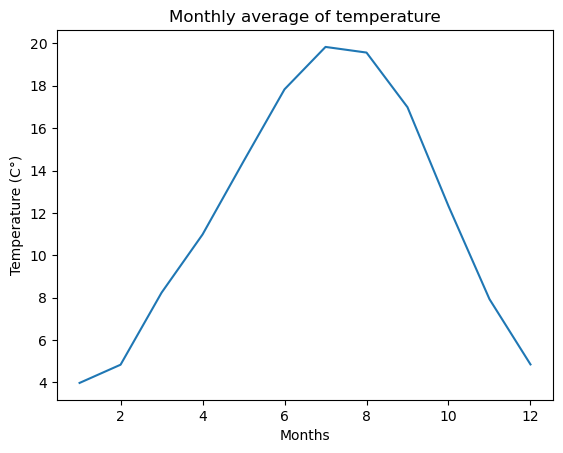

In [8]:
x=np.arange(1,13)
y=mean[:len(mean)-2]


# plot
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')

plt.show()
#we can observe a certain guassian distribution for out averages 
#the values seems to be logical with higher temeperature in summer and lower values for winter

##### plot for the evolution of temeprature per month and per city

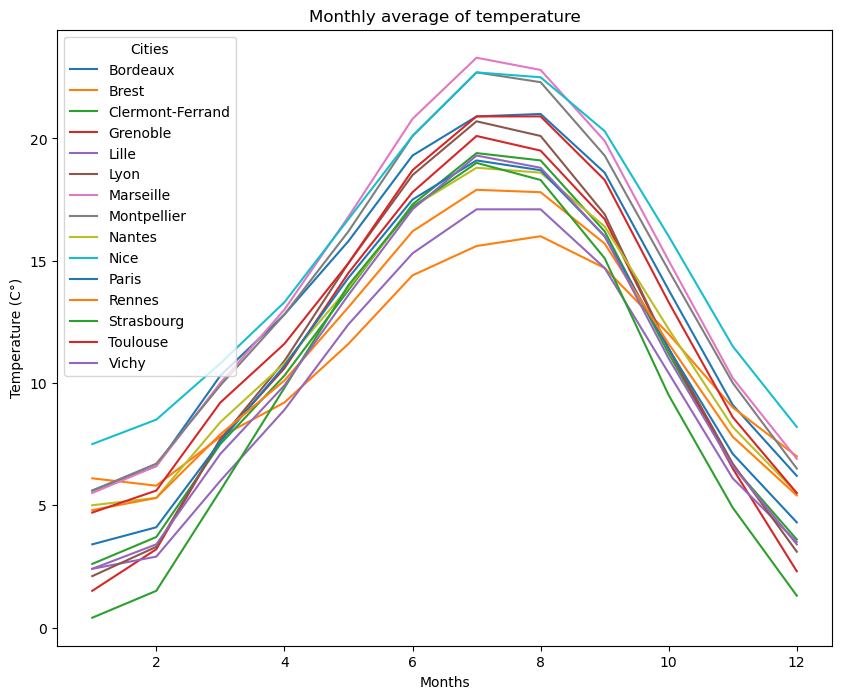

In [14]:
#average per city and per month
x=np.arange(1,13)
y=x1



# plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each point separately with its own label for the legend
for el in y:
    ax.plot(x, el[1:],label=el[0])
ax.legend(title='Cities',loc='upper left')

plt.title('Monthly average of temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (C°)')
plt.show()

##### plot of the cities and mean yearly temeperature 

In [15]:
#check the mean with respect to the cities 
mean_per_city=[]
for el in x1:
    mean_per_city.append(np.mean(el[1:]))
    
# for i in range(0,len(mean_per_city)):
#     print(cities[i],':',mean_per_city[i])
    

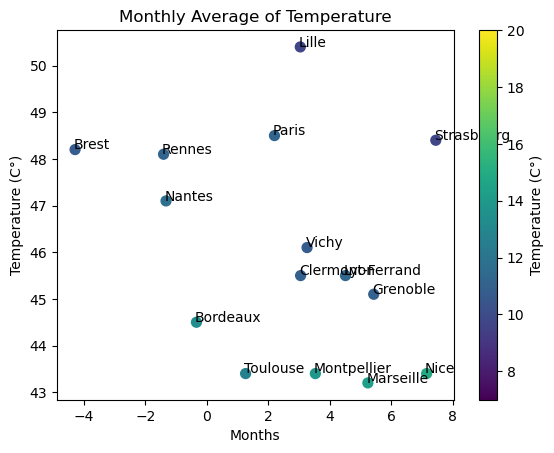

In [104]:
x_months=np.arange(1,13)
y=np.array(mean_per_city)
geo=data[:,-2:] #get the geo location



# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y, vmin=7, vmax=20, cmap='viridis', s=50)

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Temperature (C°)')

# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)

# Add labels and title
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()



#### Digits dataset


In [55]:
digits_dataset.files

['xt', 'yt', 'y', 'x']

In [59]:
digi_x=digits_dataset.get('x')
digi_xt=digits_dataset.get('xt')
digi_y=digits_dataset.get('y')
digi_yt=x=digits_dataset.get('yt')

print('x: ',digi_x.shape)
print('xt: ',digi_xt.shape)
print('y: ',digi_y.shape)
print('yt: ',digi_yt.shape)

x:  (3000, 784)
xt:  (1500, 784)
y:  (3000, 1)
yt:  (1500, 1)


In [65]:
x2=np.concatenate([digi_x, digi_xt], axis=0)
print('x2:',x2.shape)
#normalize
x2=x2.astype(np.float32)/255.0

y2=np.concatenate([digi_y, digi_yt], axis=0)
print('y2:',y2.shape)
#no need to normalize the classes values



x2: (4500, 784)
y2: (4500, 1)


(784,)
(28, 28)


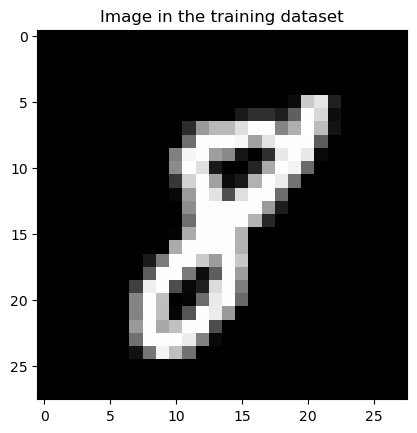

In [80]:
#change the index as you want 0-999 images of number 1
# 1000-1999 images of 7
# 2000-2999 images of 8
vector_image=x2[2000] 
img=vector_image.reshape(28,28)
print(vector_image.shape)
print(img.shape)
plt.imshow(img,cmap="gray")
plt.title('Image in the training dataset')
plt.show()

(784,)
(28, 28)


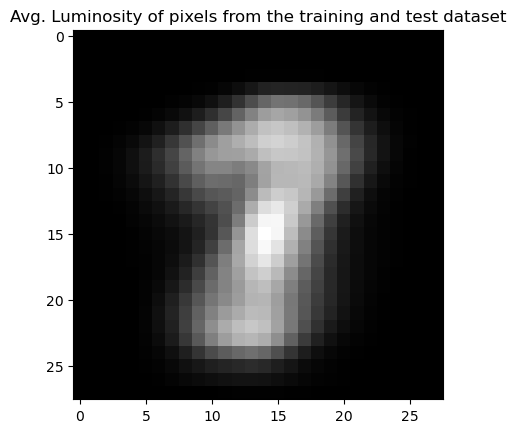

In [ ]:
digit_mean=np.mean(x2,axis=0)
print(digit_mean.shape)

img_mean=digit_mean.reshape(28,28)
print(img_mean.shape)
plt.imshow(img_mean,cmap="gray")
plt.title('Avg. Luminosity of pixels from the training and test dataset')
plt.show()

### 2 Custering

In [90]:
from sklearn.cluster import KMeans

#### Temeperature dataset

- Plot of the centroids (K=3)

In [198]:
#fitting the model 

#fit the kmeans k=3
from matplotlib.colors import ListedColormap

x1=np.array(data) 
kmeans=KMeans(n_clusters=3,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


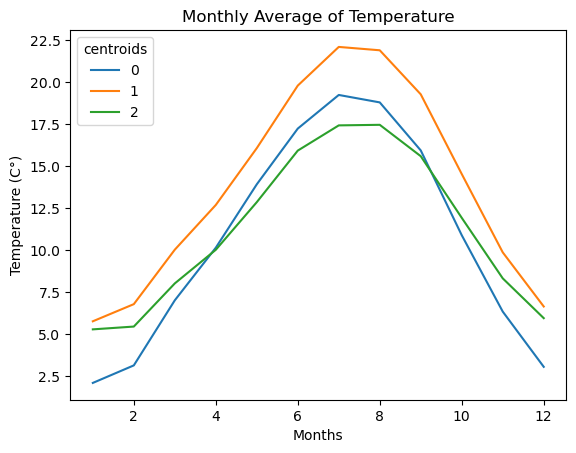

In [ ]:
x_months=np.arange(1,13)
cleaned_centroids=centroids[:,:-2] #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

#3 clusters 
# 0: cities very cold in winter and have an average summer
# 1: cities hotter on average in winter and as well in summer (probably southern cites)
# 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region) 

- Plot of the centroids (K=4)

In [201]:
#fitting the model 

#fit the kmeans k=4
from matplotlib.colors import ListedColormap

x1=np.array(data) 
kmeans=KMeans(n_clusters=4,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


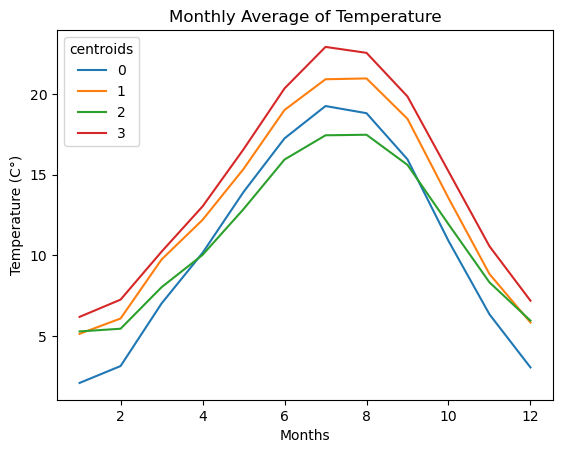

In [202]:
x_months=np.arange(1,13)

cleaned_centroids=centroids[:,:-2] #take out the longitude and lattitude

# Create figure and axes
fig, ax = plt.subplots()

# # Scatter plot with color
# scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)
for i,el in enumerate(cleaned_centroids):
    ax.plot(x_months,el,label=i)


# Add labels and title
ax.legend(title='centroids',loc='upper left')
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

#3 clusters 
# 0: cities very cold in winter and have an average summer
# 1: cities hotter on average in winter and as well in summer (probably southern cites)
# 2: cities with an average summer temperatures but also a not very cold winter (it's the class with the slowest variance a big chance it's the bretanie region)
# 3: cities with hotter sumer and hotter winter probably cities that are in the south but not on facing the sea hence the great heat in summer 

- Temperature dataset (K=3)

In [203]:
#fitting the model 

#fit the kmeans k=3
from matplotlib.colors import ListedColormap

x1=np.array(data) 
kmeans=KMeans(n_clusters=3,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


In [204]:
cities_clustering = np.concatenate([cities.reshape(-1,1), labels.reshape(-1,1)], axis=1)
cities_clustering
#my intial hypothesis seem to be good 

array([['Bordeaux', '1'],
       ['Brest', '2'],
       ['Clermont-Ferrand', '0'],
       ['Grenoble', '0'],
       ['Lille', '0'],
       ['Lyon', '0'],
       ['Marseille', '1'],
       ['Montpellier', '1'],
       ['Nantes', '2'],
       ['Nice', '1'],
       ['Paris', '0'],
       ['Rennes', '2'],
       ['Strasbourg', '0'],
       ['Toulouse', '1'],
       ['Vichy', '0']], dtype='<U16')

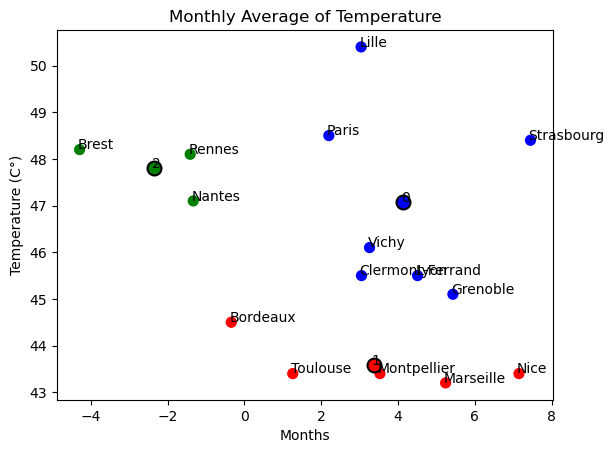

In [205]:

#fit the kmeans k=3
from matplotlib.colors import ListedColormap

x1=np.array(data) 
kmeans=KMeans(n_clusters=3,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

x_months=np.arange(1,13)
y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green']
cmap=ListedColormap(colors)

geo_centroids=centroids[:,-2:]

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

for i in range(0,len(centroids)):
    ax.scatter(geo_centroids[i,1],geo_centroids[i,0],color=colors[i],edgecolors='black',linewidth=1.5,s=100)


# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)


for i in range(0,len(centroids)):
    ax.text(geo_centroids[i,1]-0.05, geo_centroids[i,0]+0.01, i, fontsize=10)


# Add labels and title
ax.set_title('Monthly Average of Temperature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature (C°)')

plt.show()

#clearly there's a clustering that's happening regarding geography buy also there's 
# temeperature is connexted to geography so even we don't include geographical data we would 
#more or less the same disposition

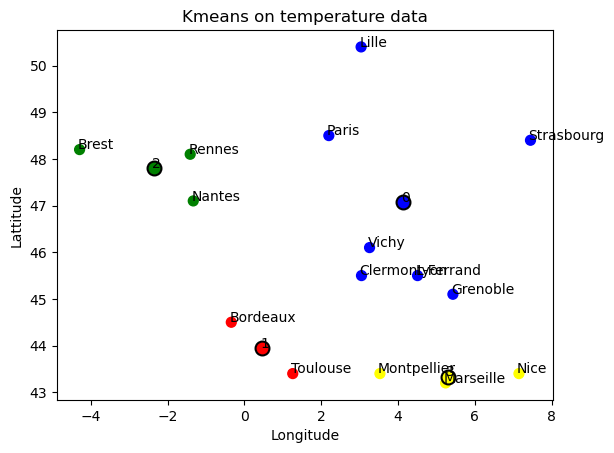

In [206]:
#fit the kmeans k=4
from matplotlib.colors import ListedColormap

x1=np.array(data) 
kmeans=KMeans(n_clusters=4,random_state=42,n_init="auto")
kmeans.fit(x1)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_


y=labels
geo=data[:,-2:] #get the geo location
colors=['blue','red','green','yellow']
cmap=ListedColormap(colors)

geo_centroids=centroids[:,-2:]

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(geo[:,1], geo[:,0], c=y,cmap=cmap, s=50)

for i in range(0,len(centroids)):
    ax.scatter(geo_centroids[i,1],geo_centroids[i,0],color=colors[i],edgecolors='black',linewidth=1.5,s=100)


# Add point labels
for i, label in enumerate(cities):
    ax.text(geo[i][1]-0.05, geo[i][0]+0.01, label, fontsize=10)


for i in range(0,len(centroids)):
    ax.text(geo_centroids[i,1]-0.05, geo_centroids[i,0]+0.01, i, fontsize=10)


# Add labels and title
ax.set_title('Kmeans on temperature data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

plt.show()

#when we observe the k=4 we can realize that the geographical impact has reduces 
#my assumption that cities who are very cold in the winter yet slightly hot have their own cluster (Paris, Lyon)
#cities colder all year around have their cluster (Brest, Rennes)
#cities that are hotter but a summer that is slightly fresh (the sea acess) hence Nice, Marseille get their clusters
#Finaly hot cities in summers and the winter isn't very intense (Toulouse and Bordeaux)

#### Digits dataset

- plot the centroids (because we are in higher dimensions we would use PCA for plotting)

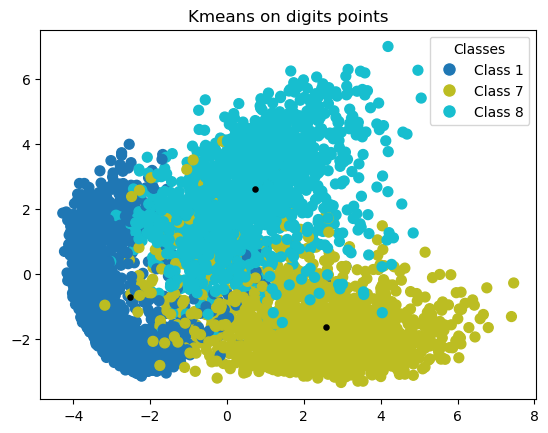

In [208]:
from matplotlib.lines import Line2D

#apply Kmeans clustering for digits k=3
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#Apply PCA to be able to plot 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2_2D = pca.fit_transform(x2)

#let's transform the centroîds as well
centroids_2D = pca.transform(centroids)

#Now for the plot

# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)

for i in range(0,len(centroids_2D)):
    ax.scatter(centroids_2D[i][0],centroids_2D[i][1],color='black',edgecolors='black',linewidth=1.5,s=10)
    
    
#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('Kmeans on digits points')
plt.show()
#the clusters seems to be very well spread around the classes

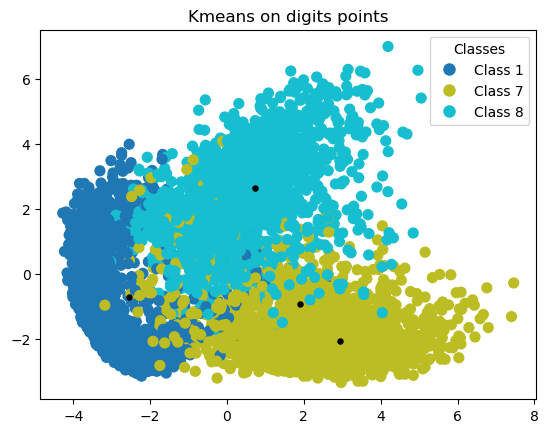

In [211]:
from matplotlib.lines import Line2D

#apply Kmeans clustering for digits k=4
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

#Apply PCA to be able to plot 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2_2D = pca.fit_transform(x2)

#let's transform the centroîds as well
centroids_2D = pca.transform(centroids)

#Now for the plot


# Create figure and axes
fig, ax = plt.subplots()

# Scatter plot with color
scatter = ax.scatter(x2_2D[:,0], x2_2D[:,1], c=y2,cmap='tab10', s=50)

for i in range(0,len(centroids_2D)):
    ax.scatter(centroids_2D[i][0],centroids_2D[i][1],color='black',edgecolors='black',linewidth=1.5,s=10)
    
    
#visualize labels for classes
unique_labels = np.unique(y2)
colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]


# Create legend handles
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10,
                          label=f'Class {label}')
                   for color, label in zip(colors, unique_labels)]

# Add legend
plt.legend(handles=legend_elements, title='Classes')

# Add labels and title
ax.set_title('Kmeans on digits points')


plt.show()

#with k=4 we can observe a new cluster that encapsulates some class 1 and 7 which is expected since the writing 1, 7 
# are alot closer then 1,8 or 7,8.



- Display of centroids images (the average of the images composing the cluster)
work with k=3

In [214]:
#apply Kmeans clustering for digits k=3
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(x2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

In [218]:
images=[]
for el in centroids:
    images.append(el.reshape(28,28))
print(len(images))

3


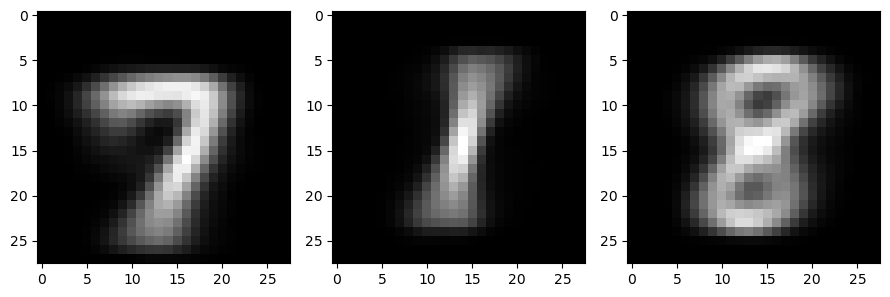

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, img in zip(axes,images):
    ax.imshow(img,cmap='gray')
    
plt.tight_layout()
plt.show()

#Images are not very clear but we can observe a 7,1,8 which corresponds to our classes 
#we can say the do to a certain extent resemble a image from our dataset
#!! could you tell if a cluster centroid is a true image ? >> yes since it's the average of another images
# so it's a bad quality image 

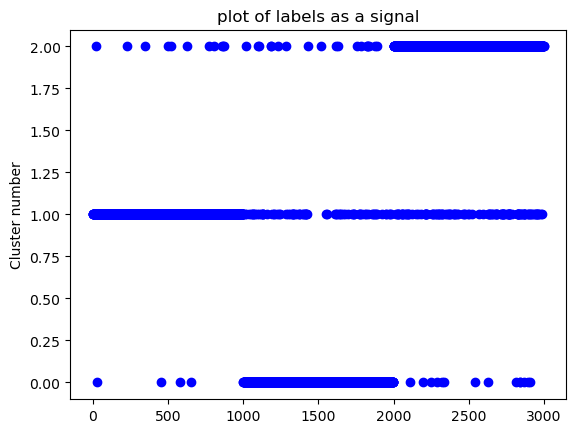

In [ ]:
#plot the predicted labels as signal 
#let's consider only labels from the training x as it follows a certain order
signal_labels=labels[:-len(xt)]
x_signal=np.arange(len(signal_labels))

# plot
fig, ax = plt.subplots()
ax.scatter(x_signal, signal_labels ,linestyle='-', color='blue')
plt.title('plot of labels as a signal')
plt.ylabel('Cluster number')

plt.show()
## we can observe 
## for cluster 0 it's more around [1000-1999]
## for cluster 2 it is around [2000-2999]
## for cluster 1 which represents the the class '1' it doesn't seem to be respecting the order
## this mainly because the number 1 in written is a composition of 7 and 8 so a badly written 
## 7 or 8 are easily interpeted as 1 but on the other hand a badly written can be hardly 
## assigned as 1

- Check the quality of the clustering 

In [237]:
y2.shape

(4500, 1)

In [241]:

y_true.shape

(4500,)

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score

#for this we used the training and test data 
y_true=y2.ravel()
y_pred=labels.ravel()
ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)


ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari)



Rand Index: 0.8876126546639994
Adjusted Rand Index: 0.7481880864638025


##### finish 2.3.4 question the move to density estimation